In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sequencer import *
import time

init_sequencer()
reboot_fpga()

MUPPET1_SEQUENCER_TEST
SPI access okay


In [3]:
##################################
#       what ist this ? 
##################################

# we test the MUPPET TDC with it's internal test pulser.
# When the test pulser is active, the physical signal inputs are ignored

In [4]:
# this clears the working memory for pulses
clear_pulses()

clear_registers()
reset_channels()

set_cycle_period("1000m")
seq_free_running(1)


configure_ppg_channels()
seq_update_config()
sequencer_enable()

In [5]:
# enable test pulser for the first 4 channels
for i in range(4):
    enable_test_pulser(i)
    #disable_test_pulser(i)
    
    
# read scalers
for ch in range(4):
    print("CH{} rate: {:8.1f} Hz".format(ch,read_tdc_scaler_rate_hz(ch)))

CH0 rate: 8540011.1 Hz
CH1 rate: 8539043.9 Hz
CH2 rate: 8537321.8 Hz
CH3 rate: 8542739.7 Hz


In [12]:
# we read out channel 0 for circa a millisecond

ch = 0


enable_tdc_chan(0)

reset_tdc()


enable_tdc()
time.sleep(0.001)
disable_tdc()


start = time.time()
block = slurp_fifo(ch)
end = time.time()
print("acquired {} words of data from fifo".format(len(block)))
print("data transfer took {:3.1f} us".format((end - start)*1e6))


leading_edges, widths = decode_block_to_pulses(block,polarity=1)

print("I got {} complete pulses with positive polarity".format(len(leading_edges)))

print("following pulse widths (ns) were recorded:")
set(np.round(widths*1e9,1))

acquired 16384 words of data from fifo
data transfer took 89287.8 us
I got 7917 complete pulses with positive polarity
following pulse widths (ns) were recorded:


{-1691.7, -1691.2, 15.0, 15.4}

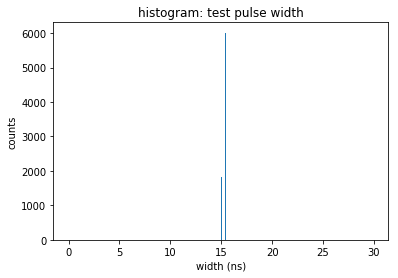

stdev: 162.014 ns


In [13]:
plt.hist(widths*1e9,bins=np.arange(0,30,0.1))
plt.title("histogram: test pulse width")
plt.xlabel("width (ns)")
plt.ylabel("counts")
plt.show()
print("stdev: {:3.3f} ns".format(np.std(widths*1e9)))

In [14]:
print("I got the following periods (in ns):")
periods = leading_edges[1:]-leading_edges[0:-1]
set([round(p,1) for p in (periods*1e9)])

I got the following periods (in ns):


{-1590.0, -1589.6, -1589.2, 116.7, 117.1, 117.5}

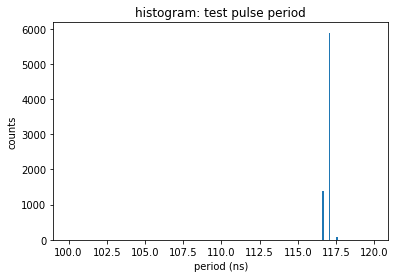

stdev: 431.383 ns


In [15]:
plt.hist(periods*1e9,bins=np.arange(100,120,.1))
plt.title("histogram: test pulse period")
plt.xlabel("period (ns)")
plt.ylabel("counts")
plt.show()
print("stdev: {:3.3f} ns".format(np.std(periods*1e9)))